In [0]:
%tensorflow_version 1.x

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Convolution2D, MaxPooling2D
# from keras.utils import np_utils
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# plt.imshow(X_train[0])
import pickle
from keras.optimizers import SGD
from keras import regularizers

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# root = '/content/drive/My Drive/'
root = '.'
# curDir = root + 'large_inverted/'
curDir = root + 'large_nf_InvertZY2/'


nset = 'large_set1'
wData = np.genfromtxt(curDir + nset + '_W.dat')
jData = np.genfromtxt(curDir + nset + '_J.dat')
zData = np.genfromtxt(curDir + nset + '_Z.dat')
xData = np.genfromtxt(curDir + nset + '_X.dat')
yData = np.genfromtxt(curDir + nset + '_Y.dat')

cntwj = len(wData)

In [0]:
picDir =  root + 'phase_diagram_pictures2/'

In [0]:
print(cntwj)

157609


In [0]:
def read_data(minj, maxj, minw, maxw):
  #чтобы нормально делать только одно значение j
  resind = {}
  resind2 = {}
  for i in range (cntwj):
    # print()
    if ((minw < wData[i] < maxw) and (minj < jData[i] < maxj)):
      if (not jData[i] in resind):
        resind[jData[i]] = []
      resind[jData[i]].append(i)
      if (not wData[i] in resind2):
        resind2[wData[i]] = []
      resind2[wData[i]].append(i)
  return (resind, resind2)


jmin, jmax, wmin, wmax = 0.1, 0.4, 2.3, 4
(ind, ind2) = read_data(jmin, jmax, wmin, wmax)
# print(ind[0:1000])
print(ind.keys())
print(ind2.keys())
name = "j=" + str(jmin) + "-" + str(jmax) + "_w=" + str(wmin) + "-" + str(wmax) + "_"
print(name)
print(len(ind))
print(len(ind2))
# for jj in ind.keys():
#   print(ind[jj])
#   print(jData[ind[jj]])
#   print(wData[ind[jj]])

# print()

dict_keys([0.10199999999999998, 0.10799999999999998, 0.11399999999999996, 0.11999999999999997, 0.12599999999999997, 0.13199999999999998, 0.13799999999999996, 0.14399999999999996, 0.14999999999999997, 0.15599999999999994, 0.16199999999999995, 0.16799999999999995, 0.17399999999999996, 0.17999999999999997, 0.18599999999999994, 0.19199999999999995, 0.19799999999999995, 0.20399999999999993, 0.20999999999999994, 0.21599999999999994, 0.22199999999999995, 0.22799999999999995, 0.23399999999999993, 0.23999999999999994, 0.24599999999999994, 0.25199999999999995, 0.25799999999999995, 0.26399999999999996, 0.26999999999999996, 0.27599999999999997, 0.282, 0.2879999999999999, 0.29399999999999993, 0.29999999999999993, 0.30599999999999994, 0.31199999999999994, 0.31799999999999995, 0.32399999999999995, 0.32999999999999996, 0.33599999999999997, 0.3419999999999999, 0.3479999999999999, 0.3539999999999999, 0.35999999999999993, 0.36599999999999994, 0.37199999999999994, 0.37799999999999995, 0.3839999999999999, 

In [0]:
print(ind.keys())
print(ind[1.1219999999999997])
print(len(ind[1.1219999999999997]))

dict_keys([0.7559999999999998, 0.7619999999999998, 0.7679999999999998, 0.7739999999999998, 0.7799999999999998, 0.7859999999999998, 0.7919999999999998, 0.7979999999999998, 0.8039999999999998, 0.8099999999999998, 0.8159999999999998, 0.8219999999999998, 0.8279999999999998, 0.8339999999999999, 0.8399999999999999, 0.8459999999999998, 0.8519999999999998, 0.8579999999999998, 0.8639999999999998, 0.8699999999999998, 0.8759999999999998, 0.8819999999999998, 0.8879999999999998, 0.8939999999999998, 0.8999999999999998, 0.9059999999999998, 0.9119999999999998, 0.9179999999999998, 0.9239999999999998, 0.9299999999999998, 0.9359999999999997, 0.9419999999999997, 0.9479999999999997, 0.9539999999999997, 0.9599999999999997, 0.9659999999999997, 0.9719999999999998, 0.9779999999999998, 0.9839999999999998, 0.9899999999999998, 0.9959999999999998, 1.0019999999999998, 1.0079999999999998, 1.0139999999999998, 1.0199999999999998, 1.0259999999999998, 1.0319999999999998, 1.0379999999999998, 1.0439999999999998, 1.0499999

In [0]:
1.832745592008

In [0]:
X = zData[indicies]
j = jData[indicies]
w = wData[indicies]

In [0]:
# gendata()
print(len(ind))
print(len(ind2))


# print(indicies)

125
220


In [0]:
def my_ranspose(arr):
  (a, b, c) = arr.shape
  # print(a, b, c)
  res = []
  for j in range(0, b, 5):
    for i in range(a):
      res.append(arr[i][j])
  return np.array(res)


In [0]:
wkeys = list(ind2.keys())
jkeys = list(ind.keys())
wkeys.sort()
jkeys.sort()
print(wkeys)
print(jkeys)

def gendata2():
  train_test = []

  # [(train, test), (train, test)] 3  к 1
  for wi in range(0, len(ind2) // 8):
    X_train = []
    for i in range(6):
      # print(wkeys[wi + i])
      indicies = ind2.get(wkeys[wi * 8 + i])
      xx = []
      for ii in indicies:
    
        c = np.concatenate((zData[ii], xData[ii], yData[ii]))
        # print(c.shape)
        xx.append(np.concatenate((zData[ii], xData[ii], yData[ii])))
      X_train.append(np.array(xx))
    # print(np.array(X_train).shape)
    X_train = my_ranspose(np.array(X_train))
    # print("haha", X_train.shape)

      #  = np.array([np.concatenate((zData[indicies], 
      #                                 xData[indicies[j*total_size + i]],
      #                                 yData[indicies[j*total_size + i]])) for j in range(each_len)  for i in range(train_size)  ])
    X_test = []
    for i in range(6, 8):
      indicies = ind2.get(wkeys[wi * 8  + i])
      xx = []
      for ii in indicies:
        xx.append(np.concatenate((zData[ii], xData[ii], yData[ii])))
      # print(np.array(X_test).shape)
      X_test.append(np.array(xx))
    X_test = my_ranspose(np.array(X_test))
    train_test.append((wkeys[wi  * 8 + 4], X_train, X_test))
  return train_test
# print()
data = gendata2()
print(len(data))
print(np.array(data[0][1]).shape)
each_len = np.array(data[0][1]).shape[0] // 6
print(each_len)
each_len = np.array(data[0][2]).shape[0] // 2
print(each_len)
# print(data[0])

[2.30428211596, 2.3133501260359997, 2.3224181361119998, 2.331486146188, 2.340554156264, 2.3496221663399997, 2.3586901764159998, 2.367758186492, 2.376826196568, 2.3858942066439996, 2.3949622167199998, 2.404030226796, 2.4130982368719995, 2.4221662469479996, 2.4312342570239998, 2.4403022671, 2.449370277176, 2.4584382872519996, 2.4675062973279998, 2.476574307404, 2.4856423174799995, 2.4947103275559996, 2.5037783376319998, 2.512846347708, 2.521914357784, 2.5309823678599996, 2.5400503779359997, 2.549118388012, 2.5581863980879995, 2.5672544081639996, 2.5763224182399997, 2.585390428316, 2.594458438392, 2.6035264484679996, 2.6125944585439997, 2.62166246862, 2.6307304786959995, 2.6397984887719996, 2.6488664988479997, 2.657934508924, 2.667002519, 2.6760705290759996, 2.6851385391519997, 2.694206549228, 2.7032745593039995, 2.7123425693799996, 2.7214105794559997, 2.730478589532, 2.739546599608, 2.7486146096839996, 2.7576826197599997, 2.766750629836, 2.7758186399119995, 2.7848866499879996, 2.79395466

In [0]:

print(ind2.keys())
print(ind.keys())
print([data[i][0] for i in range(len(data))])
ww = [data[i][0] for i in range(len(data))]
print(len(ww))


jj = jData[ind2.get(2.041309823756)]
for i in range(0, len(ww), 5):
  print(i // 5, ww[i])
print(len(jj))
print(jj)
for i in range(len(jj)):
  if (i % 5 == 0):
    print(i // 5, jj[i])
    
  # print(i)

dict_keys([2.005037783452, 2.014105793528, 2.0231738036039997, 2.03224181368, 2.041309823756, 2.050377833832, 2.0594458439079997, 2.068513853984, 2.07758186406, 2.086649874136, 2.0957178842119997, 2.104785894288, 2.113853904364, 2.12292191444, 2.1319899245159997, 2.141057934592, 2.150125944668, 2.159193954744, 2.1682619648199997, 2.1773299748959998, 2.186397984972, 2.195465995048, 2.2045340051239997, 2.2136020151999998, 2.222670025276, 2.231738035352, 2.2408060454279997, 2.2498740555039998, 2.25894206558, 2.268010075656, 2.2770780857319997, 2.2861460958079998, 2.295214105884, 2.30428211596, 2.3133501260359997, 2.3224181361119998, 2.331486146188, 2.340554156264, 2.3496221663399997, 2.3586901764159998, 2.367758186492, 2.376826196568, 2.3858942066439996, 2.3949622167199998, 2.404030226796, 2.4130982368719995, 2.4221662469479996, 2.4312342570239998, 2.4403022671, 2.449370277176, 2.4584382872519996, 2.4675062973279998, 2.476574307404, 2.4856423174799995, 2.4947103275559996, 2.50377833763199

In [0]:
# indicies = ind2[1.832745592008]
# print(indicies)
X_train = []
X_test = []
train_size = 0
test_size = 0
each_len = 12
train_size = 3
total_size = 0
def gendata():
  global X_train
  global X_test
  global test_size
  global train_size
  global total_size

  print ("start gen")
  

  total_size = (len(indicies)//each_len)
  
  test_size = total_size - train_size

  # print(len(indicies))
  print(total_size)
  print(train_size)
  print(test_size)
  X = np.array(indicies)
  xx = (np.concatenate((zData[indicies[0]], xData[indicies[0]] )))
  # print(xx.shape)
  X_train = np.array([np.concatenate((zData[indicies[j*total_size + i]], 
                                      xData[indicies[j*total_size + i]],
                                      yData[indicies[j*total_size + i]])) for j in range(each_len)  for i in range(train_size)  ])
  X_test = np.array([np.concatenate((zData[indicies[j*total_size + i]],
                                    xData[indicies[j*total_size + i]],
                                    yData[indicies[j*total_size + i]]))  for j in range(each_len)  for i in range(train_size, total_size)  ])
  # print(X_train.shape)
  # print(X_test.shape)
  print ("end gen")


# test_size = 
# ex_len = 10


In [0]:
# X_train = np.array([j*22 + i for j in range(10)  for i in range(15)  ])
# X_test = np.array([j*22 + i for j in range(10)  for i in range(15, 22)  ])
# print(X_train)
# print(X_test)


In [0]:
res = []
def getresult():
  global res
  res = []
  global each_len
  train_size = 6
  test_size = 2

  for split_i in range(1, each_len):
    model = Sequential()
  #  kernel_regularizer=regularizers.l2(0.01)
  #  lr = 0.075
    model.add(Dense(80, input_dim=64*3, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dense(2,  kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('relu'))
    sgd = SGD(lr=0.075)
    model.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
   
    y_train = np.array([[0] for i in range(split_i * train_size)]+[[1] for i in range((each_len - split_i) * train_size)])
    y_test =  np.array([[0] for i in range(split_i * test_size)]+[[1] for i in range((each_len - split_i) * test_size)])

    Y_train = np_utils.to_categorical(y_train, 2)
    Y_test = np_utils.to_categorical(y_test, 2)
    # print(X_train.shape)
    # print(Y_train.shape)
    # print(Y_test.shape)
    # print(X_test.shape)

    model.fit(X_train, Y_train, 
            epochs=5, verbose=0)
    score =  model.evaluate(X_test, Y_test, verbose=0)
    print(score)
    res.append(score)
    if (res[0][1] < 0.8):
      res = []
      return False
  return True
  # res.append(model.evaluate(X_test, Y_test, verbose=0))

In [0]:
def find_pic (pic, jval, wmin, wmax):
  # xx = np.array([jData[indicies[j*total_size + 3]] for j in range(0, each_len - 1)])
  # # print(xx)
  # xarr = [xx[i] + (xx[1] -xx[0])/2 for i in range(0, each_len - 1)]
  # # print(xarr)
  indicies = ind2.get(jval)
  # print(indicies)
  xarr = [jData[indicies[i]] for i in range(0, len(indicies) - 5, 5)]
  
  plt.plot(xarr, [r[1] for r in res], c='b')
  plt.savefig(picDir + "j_fixed_" + str(jval) + "w_range_" +  str(wmin)  + "_" + str(wmax) +  ".png")
  plt.show()
  plt.close()
  return (xarr[pic])



In [0]:
def has_w_shape(arr):
  state = 1
  res = -1
  if (arr[0] < 0.8):
    return -1
  for i in range(1, len(arr) - 1):
    if (state == 1):
      if (arr[i] >= arr[i - 1 ]):
        state = 2
    elif (state == 2):
      if (arr[i] < arr[i - 1 ]):
        state = 3
        res = i - 1
    elif (state == 3):
      if (arr[i] >= arr[i - 1 ]):
        state = 4
    elif (state == 4):
      if (arr[i] < arr[i - 1 ]):
        state = 5
  if (state != 4):
    if (state == 5):
      print("state 5")
    return -1
  else:
    return res


[2.30428211596, 2.3133501260359997, 2.3224181361119998, 2.331486146188, 2.340554156264, 2.3496221663399997, 2.3586901764159998, 2.367758186492, 2.376826196568, 2.3858942066439996, 2.3949622167199998, 2.404030226796, 2.4130982368719995, 2.4221662469479996, 2.4312342570239998, 2.4403022671, 2.449370277176, 2.4584382872519996, 2.4675062973279998, 2.476574307404, 2.4856423174799995, 2.4947103275559996, 2.5037783376319998, 2.512846347708, 2.521914357784, 2.5309823678599996, 2.5400503779359997, 2.549118388012, 2.5581863980879995, 2.5672544081639996, 2.5763224182399997, 2.585390428316, 2.594458438392, 2.6035264484679996, 2.6125944585439997, 2.62166246862, 2.6307304786959995, 2.6397984887719996, 2.6488664988479997, 2.657934508924, 2.667002519, 2.6760705290759996, 2.6851385391519997, 2.694206549228, 2.7032745593039995, 2.7123425693799996, 2.7214105794559997, 2.730478589532, 2.739546599608, 2.7486146096839996, 2.7576826197599997, 2.766750629836, 2.7758186399119995, 2.7848866499879996, 2.79395466

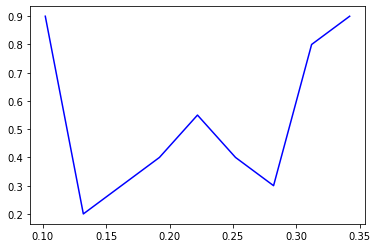

new data
[nan, 0.10000000149011612]
retry!!!
[1.7287499904632568, 0.8999999761581421]
[nan, 0.20000000298023224]
[nan, 0.30000001192092896]
[9.788283348083496, 0.4000000059604645]
[8.176092147827148, 0.5]
[0.832061231136322, 0.6000000238418579]
[nan, 0.699999988079071]
[nan, 0.800000011920929]
[1.729066252708435, 0.8999999761581421]
retry!!!
[nan, 0.10000000149011612]
new data
[0.8946825265884399, 0.10000000149011612]
retry!!!
[1.72868013381958, 0.8999999761581421]
[1.053208827972412, 0.20000000298023224]
[0.8363046050071716, 0.699999988079071]
[0.7523839473724365, 0.6499999761581421]
[nan, 0.5]
[nan, 0.6000000238418579]
[nan, 0.699999988079071]
[nan, 0.800000011920929]
[nan, 0.8999999761581421]
ok!!!
2


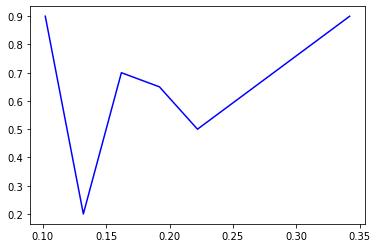

new data
[nan, 0.10000000149011612]
retry!!!
[1.728042721748352, 0.8999999761581421]
[0.8551904559135437, 0.800000011920929]
[4.9517903327941895, 0.699999988079071]
[0.7924371957778931, 0.6000000238418579]
[nan, 0.5]
[nan, 0.6000000238418579]
[nan, 0.699999988079071]
[0.5796723961830139, 0.800000011920929]
[nan, 0.8999999761581421]
retry!!!
[2.2255592346191406, 0.8999999761581421]
[3.340033769607544, 0.800000011920929]
[4.951634407043457, 0.699999988079071]
[0.770055890083313, 0.75]
[nan, 0.5]
[nan, 0.6000000238418579]
[4.95164680480957, 0.699999988079071]
[nan, 0.800000011920929]
[nan, 0.8999999761581421]
ok!!!
3


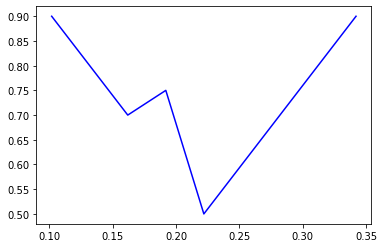

new data
[14.621976852416992, 0.10000000149011612]
retry!!!
[nan, 0.10000000149011612]
retry!!!
[nan, 0.10000000149011612]
new data
[nan, 0.10000000149011612]
retry!!!
[8792.1298828125, 0.10000000149011612]
retry!!!
[1.7374824285507202, 0.8999999761581421]
[nan, 0.20000000298023224]
[nan, 0.30000001192092896]
[nan, 0.4000000059604645]
[nan, 0.5]
[0.7836238741874695, 0.550000011920929]
[1.2000489234924316, 0.30000001192092896]
[0.5307893753051758, 0.800000011920929]
[nan, 0.8999999761581421]
ok!!!
5


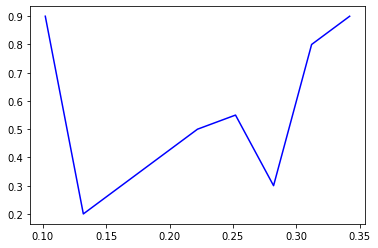

new data
[nan, 0.10000000149011612]
retry!!!
[nan, 0.10000000149011612]
retry!!!
[1.727312445640564, 0.8999999761581421]
[nan, 0.20000000298023224]
[0.7431536912918091, 0.699999988079071]
[0.8315306305885315, 0.550000011920929]
[nan, 0.5]
[0.7286197543144226, 0.800000011920929]
[0.7336606979370117, 0.699999988079071]
[nan, 0.800000011920929]
[nan, 0.8999999761581421]
state 5
new data
[nan, 0.10000000149011612]
retry!!!
[0.3989115059375763, 0.8999999761581421]
[0.52912437915802, 0.800000011920929]
[nan, 0.30000001192092896]
[0.7579491138458252, 0.6499999761581421]
[nan, 0.5]
[5.826921463012695, 0.6000000238418579]
[11.399999618530273, 0.30000001192092896]
[3.340221405029297, 0.800000011920929]
[nan, 0.8999999761581421]
state 5
retry!!!
[0.3021893799304962, 0.8999999761581421]
[nan, 0.20000000298023224]
[0.7368860244750977, 0.699999988079071]
[nan, 0.4000000059604645]
[nan, 0.5]
[nan, 0.6000000238418579]
[0.6983080506324768, 0.699999988079071]
[3.3410160541534424, 0.800000011920929]
[1.7

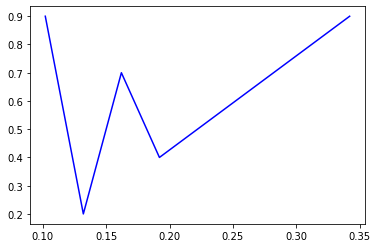

new data
[nan, 0.10000000149011612]
retry!!!
[nan, 0.10000000149011612]
retry!!!
[14.620667457580566, 0.10000000149011612]
new data
[nan, 0.10000000149011612]
retry!!!
[nan, 0.10000000149011612]
retry!!!
[1.7730318307876587, 0.8999999761581421]
[3.3402085304260254, 0.800000011920929]
[1.2954429388046265, 0.30000001192092896]
[nan, 0.4000000059604645]
[nan, 0.5]
[nan, 0.6000000238418579]
[0.7973230481147766, 0.6499999761581421]
[nan, 0.800000011920929]
[1.728568196296692, 0.8999999761581421]
new data
[1.060136318206787, 0.8999999761581421]
[1.1959539651870728, 0.20000000298023224]
[nan, 0.30000001192092896]
[0.7796162962913513, 0.6000000238418579]
[0.8150081634521484, 0.44999998807907104]
[9.786958694458008, 0.4000000059604645]
[nan, 0.699999988079071]
[nan, 0.800000011920929]
[nan, 0.8999999761581421]
ok!!!
3


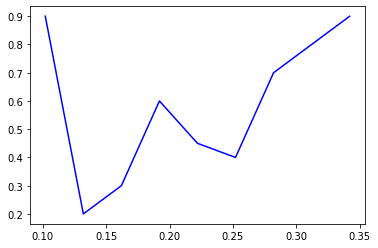

new data
[nan, 0.10000000149011612]
retry!!!
[14.623730659484863, 0.10000000149011612]
retry!!!
[1.7311334609985352, 0.8999999761581421]
[nan, 0.20000000298023224]
[0.727739691734314, 0.800000011920929]
[nan, 0.4000000059604645]
[0.7997477054595947, 0.5]
[1.4284799098968506, 0.75]
[0.7607473134994507, 0.699999988079071]
[nan, 0.800000011920929]
[nan, 0.8999999761581421]
state 5
new data
[1.1926616430282593, 0.8999999761581421]
[nan, 0.20000000298023224]
[4.951894283294678, 0.699999988079071]
[nan, 0.4000000059604645]
[nan, 0.5]
[nan, 0.6000000238418579]
[4.951766014099121, 0.699999988079071]
[0.6561417579650879, 0.800000011920929]
[nan, 0.8999999761581421]
ok!!!
2


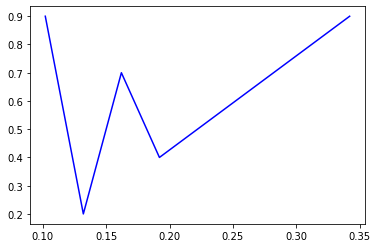

new data
[nan, 0.10000000149011612]
retry!!!
[0.5788323283195496, 0.8999999761581421]
[nan, 0.20000000298023224]
[nan, 0.30000001192092896]
[nan, 0.4000000059604645]
[0.7531305551528931, 0.550000011920929]
[nan, 0.6000000238418579]
[nan, 0.699999988079071]
[0.5867598056793213, 0.800000011920929]
[14.623995780944824, 0.10000000149011612]
retry!!!
[1.7284537553787231, 0.8999999761581421]
[3.3626177310943604, 0.800000011920929]
[nan, 0.30000001192092896]
[nan, 0.4000000059604645]
[nan, 0.5]
[0.7998234629631042, 0.6000000238418579]
[nan, 0.699999988079071]
[13.010626792907715, 0.20000000298023224]
[1.7276450395584106, 0.8999999761581421]
new data
[14.623358726501465, 0.10000000149011612]
retry!!!
[nan, 0.10000000149011612]
retry!!!
[1.0817880630493164, 0.8999999761581421]
[nan, 0.20000000298023224]
[4.950676918029785, 0.699999988079071]
[0.7952073216438293, 0.75]
[nan, 0.5]
[0.7738285660743713, 0.6000000238418579]
[0.6921483278274536, 0.699999988079071]
[0.6191993355751038, 0.8000000119209

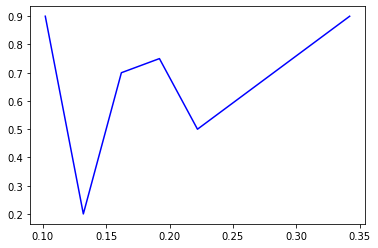

new data
[14.621631622314453, 0.10000000149011612]
retry!!!
[1.729848861694336, 0.8999999761581421]
[3.3409814834594727, 0.800000011920929]
[4.95924186706543, 0.699999988079071]
[nan, 0.4000000059604645]
[nan, 0.5]
[nan, 0.6000000238418579]


KeyboardInterrupt: ignored

In [0]:
resnew = []
jkeys = list(ind2.keys())
print(jkeys)

# for i in range(0, len(ind2), 15):
for (ww, x_tr, x_ts) in data:
  print("new data")
  global X_train
  global X_test
  X_train = x_tr
  X_test = x_ts
  f = getresult()
  if (f):
    pic = has_w_shape([r[1] for r in res])
  else:
    pic = -1
  tries = 1
  while(pic == -1 and tries < 3):
    tries += 1
    print("retry!!!")
    # print(pic)
    f = getresult()
    if (f):
      pic = has_w_shape([r[1] for r in res])
    else:
      pic = -1
  if (pic == -1):
    resnew.append(-1)
  else:
    print("ok!!!")
    print(pic)
    resnew.append(find_pic (pic , ww, wmin, wmax))





[0.22199999999999995, -1, 0.16199999999999995, 0.19199999999999995, -1, 0.25199999999999995, -1, 0.16199999999999995, -1, -1, 0.19199999999999995, -1, 0.16199999999999995, -1, 0.19199999999999995]
[0.22199999999999995, 0.16199999999999995, 0.19199999999999995, 0.25199999999999995, 0.16199999999999995, 0.19199999999999995, 0.16199999999999995, 0.19199999999999995]
[2.340554156264, 2.4856423174799995, 2.5581863980879995, 2.7032745593039995, 2.8483627205199995, 3.0659949623439995, 3.2110831235599995, 3.3561712847759995]



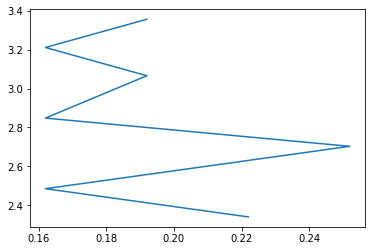

In [0]:
print(resnew)
yy= []
xx = []
for i in range(len(resnew)):
  if (resnew[i]!=-1):
    yy.append(data[i][0])
    xx.append(resnew[i])
plt.plot(xx, yy)
print(xx)
print(yy)
print("")


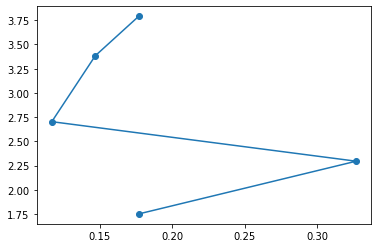

In [0]:
yy = []
xxx = []
rr = []
for i in range(0, len(ind2), 15):
  if (resnew[i // 15]!=-1):
    yy.append(jkeys[i])
    rr.append(resnew[i // 15])
plt.scatter(rr, yy)
plt.plot (rr, yy)
plt.show()

In [0]:
print(rr)
print(xx)

NameError: ignored

In [0]:
yy = []
xxx = []
for i in range(0, len(ind2), 20):
  yy.append(jkeys[i])

plt.plot (resnew, yy)
plt.show()

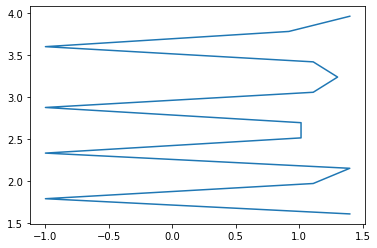

In [0]:
yy = []
xxx = []
for i in range(0, len(ind2), 20):
  yy.append(jkeys[i])

plt.plot (resnew, yy)
plt.show()